<a href="https://colab.research.google.com/github/Sajjat-Hossain/-LogisticRegression-Using-Imbalance-data/blob/main/Imbalance_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Customer-Churn-Prediction.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


(7043, 21)

**Tranning & testing**

In [5]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,train_size = .70,random_state=42)

In [6]:
train.shape

(4930, 21)

In [7]:
test.shape

(2113, 21)

In [8]:
tasting , validation = train_test_split(test,train_size = .50,random_state=42)

In [9]:
tasting.shape

(1056, 21)

In [10]:
validation.shape

(1057, 21)

In [11]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [12]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(7043, 21)

In [15]:
not_churn = (5174/(5174+1869))*100
churn = (1869/(5174+1869))*100
print('Not churned {} percent of total people'.format(not_churn))
print('Churned {} percent of total people'.format(churn))

Not churned 73.4630129206304 percent of total people
Churned 26.536987079369588 percent of total people


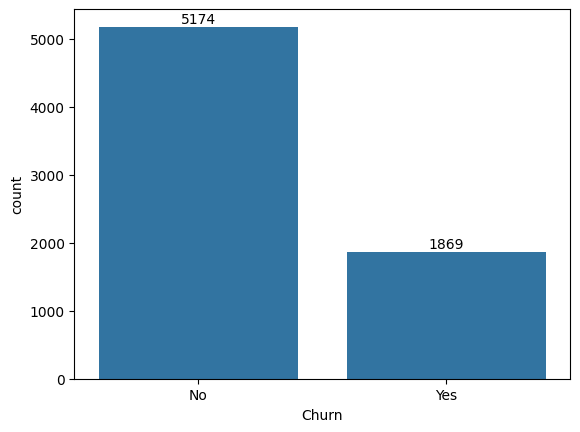

In [16]:
sns.countplot(x=df['Churn'])

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2,  # x-coordinate
             p.get_height() + 50,            # y-coordinate
             int(p.get_height()),           # The count value
             ha='center')                   # Center alignment

plt.show()

In [17]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


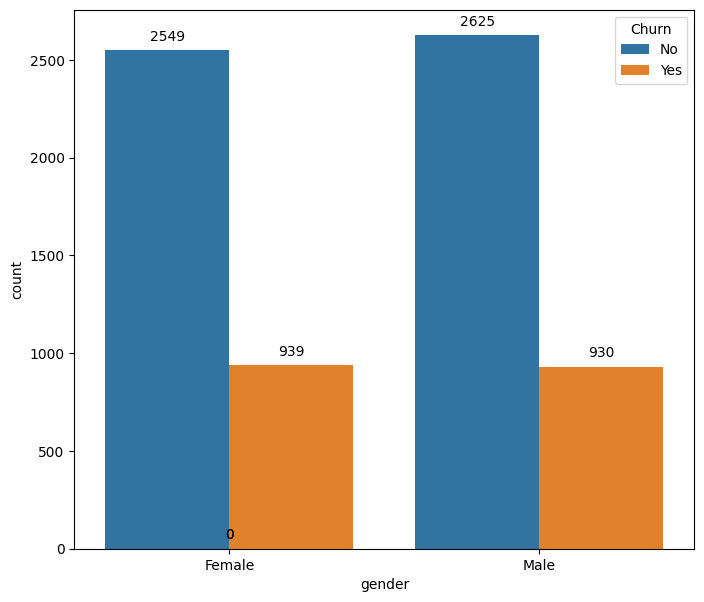

In [18]:
plt.subplots(figsize=(8,7))
sns.countplot(x='gender',hue='Churn' ,data=df)

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2,  # x-coordinate
             p.get_height() + 50,            # y-coordinate
             int(p.get_height()),           # The count value
             ha='center')                   # Center alignment

plt.show()

In [19]:
df.PaymentMethod.value_counts()

,count
PaymentMethod,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


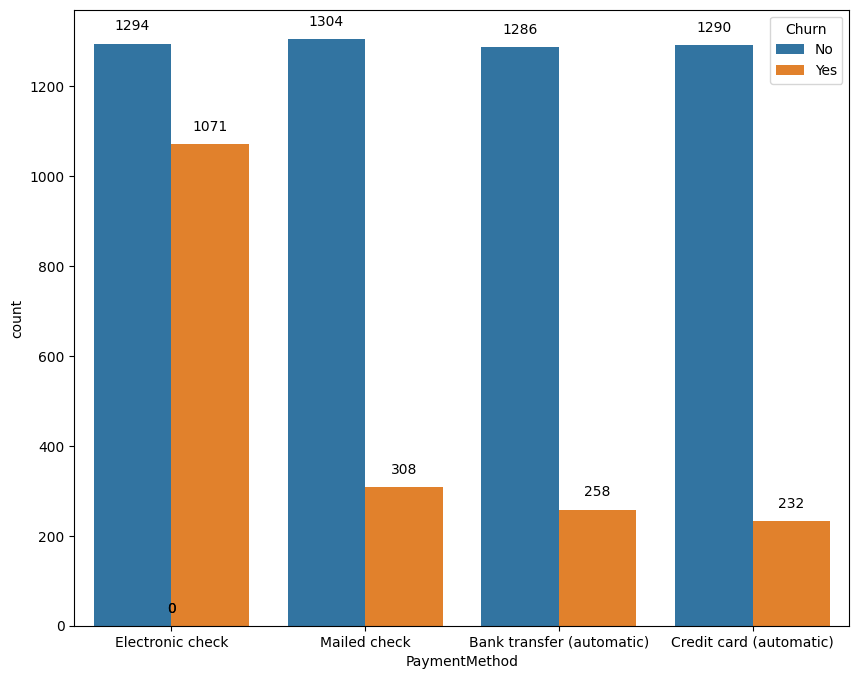

In [20]:
plt.subplots(figsize=(10,8))
sns.countplot(x='PaymentMethod',hue='Churn' ,data=df)

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2,  # x-coordinate
             p.get_height() + 30,            # y-coordinate
             int(p.get_height()),           # The count value
             ha='center')                   # Center alignment

plt.show()

In [21]:
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=np.number)

numerical_df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.01609,0.219856
tenure,0.016090,1.00000,0.247890
MonthlyCharges,0.219856,0.24789,1.000000


<Axes: >

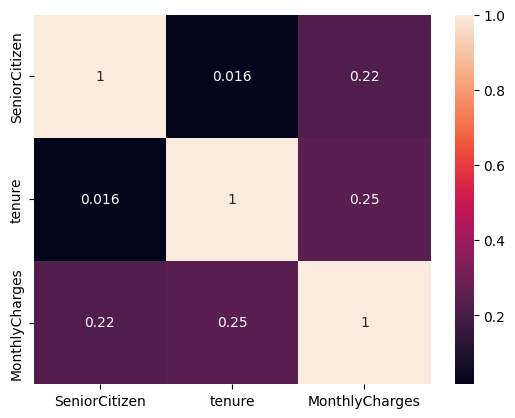

In [22]:
sns.heatmap(numerical_df.corr(),annot=True)

In [23]:
df.drop(['customerID'],axis=1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## **Encode the data set**

In [24]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [25]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [26]:
from pandas.core.dtypes.common import is_numeric_dtype

In [27]:
for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    else:
        df[column] = label.fit_transform(df[column])

In [28]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


# **seperate x, y**

In [29]:
x = df.drop(['Churn'],axis=1)
y = df['Churn']

In [30]:
x.shape

(7043, 20)

In [31]:
x.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925


In [32]:
y.value_counts()

,count
Churn,
0,5174
1,1869


In [33]:
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


# **Imbalanced Data Handling**

**Synthetic Minority Oversampling Technique**

In [34]:
df.Churn.value_counts()

,count
Churn,
0,5174
1,1869


In [35]:
not_churn = (5174/(5174+1869))*100
churn = (1869/(5174+1869))*100
print('Not churned {} percent of total people'.format(not_churn))
print('Churned {} percent of total people'.format(churn))

Not churned 73.4630129206304 percent of total people
Churned 26.536987079369588 percent of total people


In [37]:
from imblearn.combine import SMOTETomek

In [38]:
sm = SMOTETomek(random_state=100)

In [39]:
#before sampling
y.value_counts()

,count
Churn,
0,5174
1,1869


In [40]:
X,Y = sm.fit_resample(x,y)

In [41]:
Y.value_counts()

,count
Churn,
0,4701
1,4701


## **Under-Sampling**

In [42]:
from imblearn.under_sampling import NearMiss

In [43]:
NearMiss_obj = NearMiss()
new_x , new_y = NearMiss_obj.fit_resample(x,y)

In [44]:
x.shape

(7043, 20)

In [45]:
new_x.shape

(3738, 20)

In [46]:
y.value_counts()

,count
Churn,
0,5174
1,1869


In [47]:
new_y.value_counts()

,count
Churn,
0,1869
1,1869


# **WithOut Sampling using LogisticRegression**

In [48]:
x.shape

(7043, 20)

In [49]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x, y, train_size=.75,random_state=42)

In [50]:
from sklearn.linear_model import LogisticRegression
Clf = LogisticRegression()

In [51]:
Clf.fit(xtrain1,ytrain1)

LogisticRegression()

In [52]:
Clf.score(xtrain1,ytrain1)

0.7970465732677017

# **XGBoost Classifier**

# **After Sampling**

In [61]:
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(X, Y, train_size=.75,random_state=42)

In [62]:
Clf.fit(xtrain2,ytrain2)

LogisticRegression()

In [63]:
Clf.score(xtrain2,ytrain2)

0.8157708126506878